# Seaborn - 고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Seaborn package에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도

In [5]:
import matplotlib.pyplot as plt

In [23]:
sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white(defalt 값), ticks

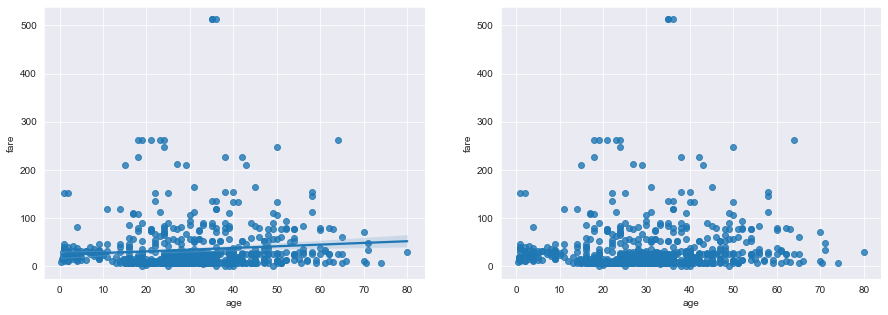

In [24]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(
  x = "age",
  y = "fare",
  data = titanic,
  ax = ax1
)

# 선형 회귀선이 미포함된 그래프 그리기
sns.regplot(
  x = "age",
  y = "fare",
  data = titanic,
  ax = ax2,
  fit_reg=False
)

plt.show()

---
### 히스토그램 / 커널밀도그래프
: 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

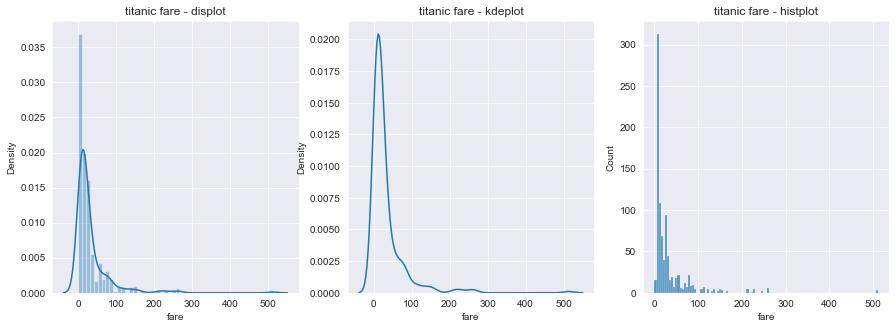

In [30]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic["fare"], ax=ax1)

# 커널 밀도
sns.kdeplot(titanic["fare"], ax=ax2)

# 히스토그램
sns.histplot(x="fare", data=titanic, ax=ax3)

# 차트 제목
ax1.set_title("titanic fare - displot")
ax2.set_title("titanic fare - kdeplot")
ax3.set_title("titanic fare - histplot")

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중되어 있다

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류

In [33]:
# size는 개수
table = titanic.pivot_table(index=["sex"], columns=["class"], aggfunc="size")
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [34]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


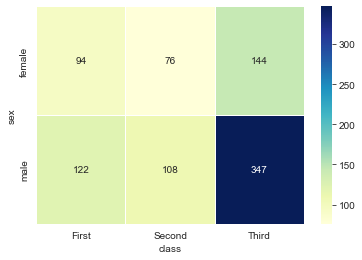

In [42]:
sns.heatmap(
  data=table,
  annot=True, # 값이 나온다
  fmt = "d", # 정수형태로 출력
  linewidths=0.5, # 칸 사이의 간격
  cmap="YlGnBu",
  cbar=True,
)

plt.show()

### 범주형 데이터의 산점도
- 범주형 변수에 들어있는 각 범주별 데이터의 분포를 확인

In [43]:
sns.set_style("whitegrid")

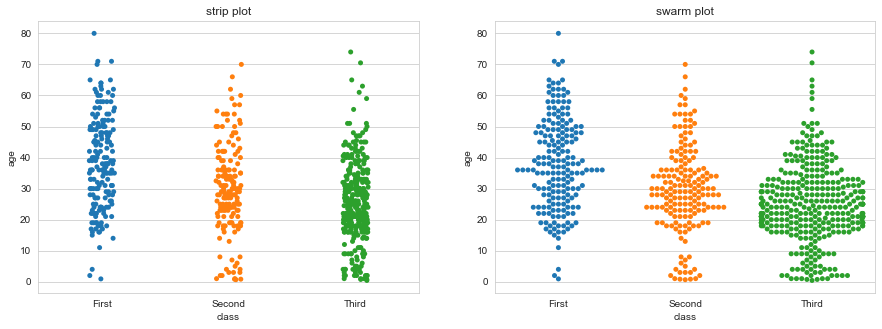

In [46]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
  x = "class",
  y =  "age",
  data=titanic,
  ax=ax1
)

# 중복값들도 표현해주는 그래프
sns.swarmplot(
  x = "class",
  y =  "age",
  data=titanic,
  ax=ax2
)

# 차트 제목
ax1.set_title("strip plot")
ax2.set_title("swarm plot")

plt.show()

---
### 막대 그래프

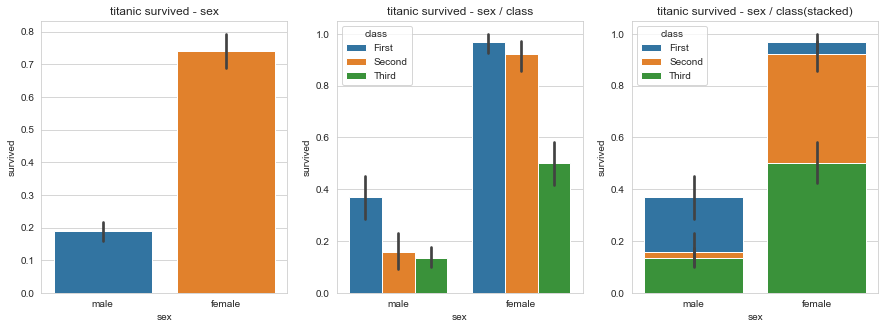

In [58]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x, y축의 변수 할당
sns.barplot(
  x = "sex",
  y = "survived",
  data = titanic,
  ax = ax1,
  # ci="sd", # 오차 막대를 표준편차에 대한 것으로 바꾸고 싶을 때 사용
)

# x, y, hue(분할해주는 역할)
sns.barplot(
  x = "sex",
  y = "survived",
  hue="class",
  data = titanic,
  ax = ax2,
  # ci="sd", # 오차 막대를 표준편차에 대한 것으로 바꾸고 싶을 때 사용
)

# x, y, hue 누적 출력
sns.barplot(
  x = "sex",
  y = "survived",
  hue="class",
  dodge=False,
  data = titanic,
  ax = ax3,
  # ci="sd", # 오차 막대를 표준편차에 대한 것으로 바꾸고 싶을 때 사용
)

# 차트 제목
ax1.set_title("titanic survived - sex")
ax2.set_title("titanic survived - sex / class")
ax3.set_title("titanic survived - sex / class(stacked)")

plt.show()

- 위 바차트의 꺼먼 직선은 오차막대(error bar)로 오차의 범위를 나타낸 막대
- 위 그래프는 95%의 신뢰 구간에 대해서 나타낸 그래프이고 그 구간의 오차 범위에 대해서 나타낸 것이 오차막대

---
### 빈도 그래프

In [59]:
sns.set_style("whitegrid")

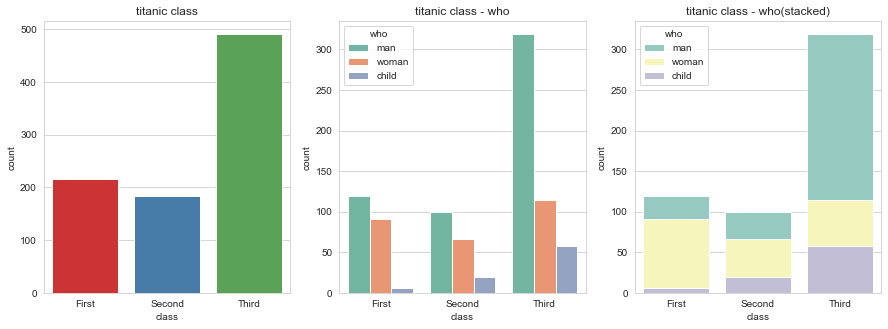

In [70]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(
  x = "class",
  data=titanic,
  ax=ax1,
  palette="Set1"
)

# hue
sns.countplot(
  x = "class",
  hue="who",
  data=titanic,
  ax=ax2,
  palette="Set2",
)

# stack
sns.countplot(
  x = "class",
  hue="who",
  data=titanic,
  ax=ax3,
  palette="Set3",
  dodge=False
)

# 차트 제목
ax1.set_title("titanic class")
ax2.set_title("titanic class - who")
ax3.set_title("titanic class - who(stacked)")

plt.show()

---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프가 추가

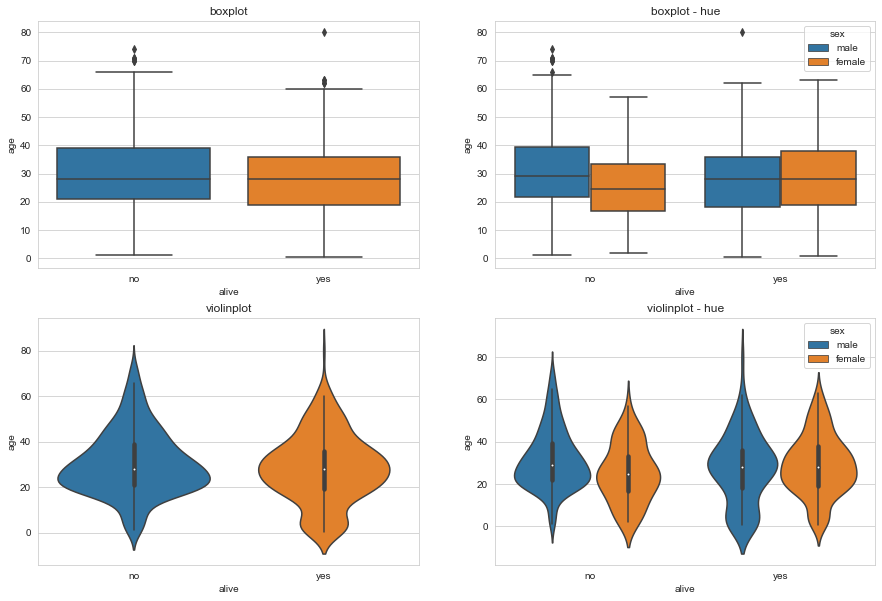

In [78]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# boxplot : 기본값
sns.boxplot(
  x="alive",
  y = "age",
  data = titanic,
  ax = ax1
)

# boxplot : 기본값 - hue: 성별
sns.boxplot(
  x="alive",
  y = "age",
  hue="sex",
  data = titanic,
  ax = ax2
)

# violinplot : 기본값
sns.violinplot(
  x="alive",
  y = "age",
  data = titanic,
  ax = ax3
)

# violinplot : 기본값 - hue: 성별
sns.violinplot(
  x="alive",
  y = "age",
  hue="sex",
  data = titanic,
  ax = ax4
)

# 차트 제목
ax1.set_title("boxplot")
ax2.set_title("boxplot - hue")
ax3.set_title("violinplot")
ax4.set_title("violinplot - hue")

plt.show()

---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

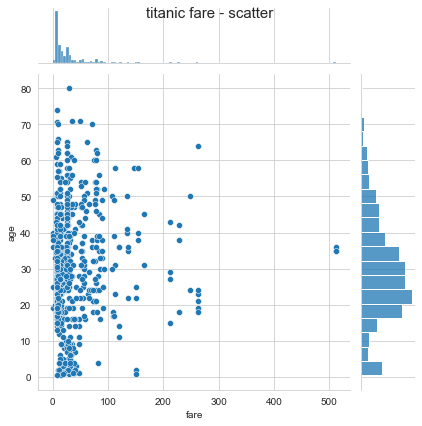

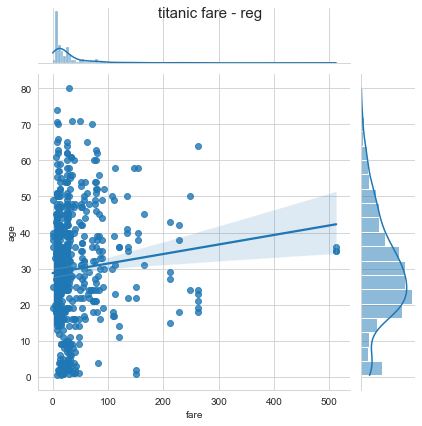

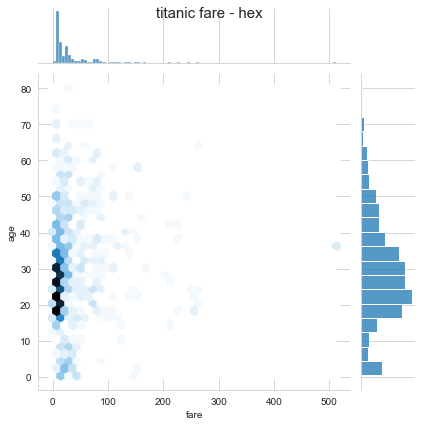

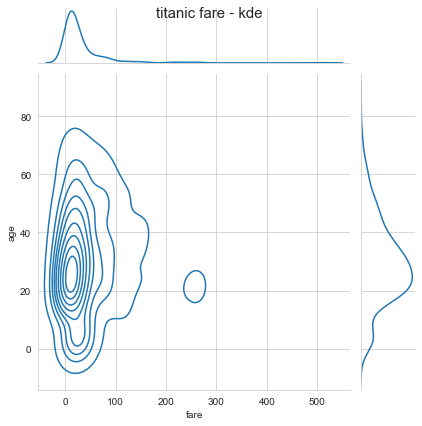

In [85]:
# 조인트 그래프 : 산점도 (기본값)
j1 = sns.jointplot(
  x = "fare",
  y = "age",
  data = titanic,
)

# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
  x = "fare",
  y = "age",
  kind = "reg",
  data = titanic,
)

# 조인트 그래프 : 육각 그래프
j3 = sns.jointplot(
  x = "fare",
  y = "age",
  kind = "hex",
  data = titanic,
)

# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
  x = "fare",
  y = "age",
  kind = "kde",
  data = titanic,
)

j1.fig.suptitle("titanic fare - scatter", size = 15)
j2.fig.suptitle("titanic fare - reg", size = 15)
j3.fig.suptitle("titanic fare - hex", size = 15)
j4.fig.suptitle("titanic fare - kde", size = 15)

plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

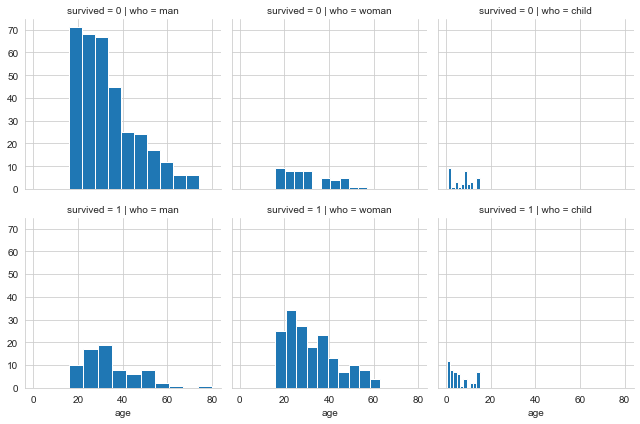

In [89]:
# 조건에 따라 Grid 나누기
g = sns.FacetGrid(
  data=titanic,
  col = "who",
  row="survived",
)
g = g.map(plt.hist, "age")

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현

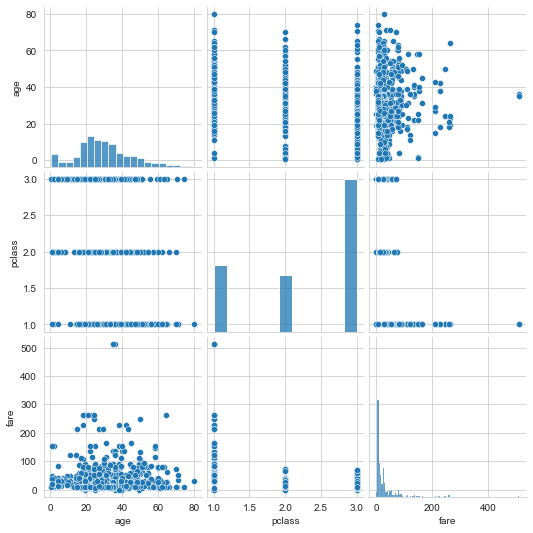

In [91]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[["age", "pclass", "fare"]]

# 조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)

plt.show()